# Modeling Clustering

In [13]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Clustering with the Iris Dataset

#### 1. Using this lesson as a guide, perform clustering on the iris dataset.

    - Choose features other than the ones used in the lesson.
    - Visualize the results of your clustering.
    - Use the elbow method to visually select a good value for k.
    - Repeat the clustering, this time with 3 different features.

In [6]:
# Import iris dataset (from seaborn because the column names are already nice)
df = sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


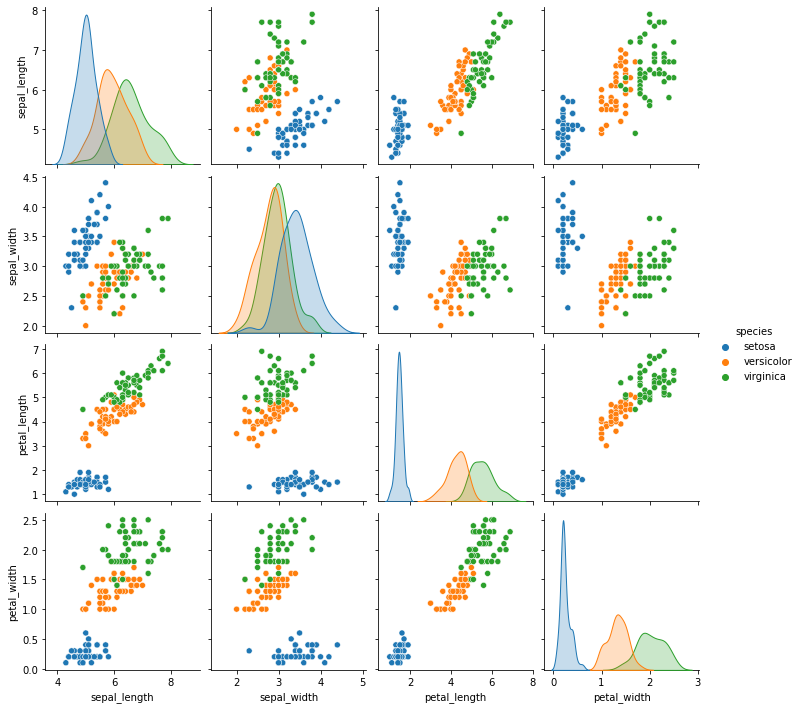

In [10]:
# Choose two features
sns.pairplot(data = df, hue = 'species')

# petal length and petal width

In [12]:
# choose selected features to go into X dataset (no train because I didn't split here)
X_df = df[['petal_width', 'petal_length']]

In [15]:
# scale the data using a standard scaler

standardscaler = StandardScaler().fit(X_df)

X_scaled = pd.DataFrame(standardscaler.transform(X_df), columns = X_df.columns).set_index([X_df.index.values])

In [16]:
X_scaled.head()

,petal_width,petal_length
0,-1.315444,-1.340227
1,-1.315444,-1.340227
2,-1.315444,-1.397064
3,-1.315444,-1.283389
4,-1.315444,-1.340227


In [20]:
# Define thing
kmeans = KMeans(n_clusters=3, random_state=713)

#Fit Thing
kmeans.fit(X_scaled)

#Use thing (using == predicting)

X_scaled['clusters'] = kmeans.predict(X_scaled)

In [39]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=['petal_width', 'petal_length'])
centroids_scaled

,petal_width,petal_length
0,1.127978,1.028000
1,-1.254893,-1.304987
2,0.165418,0.305873


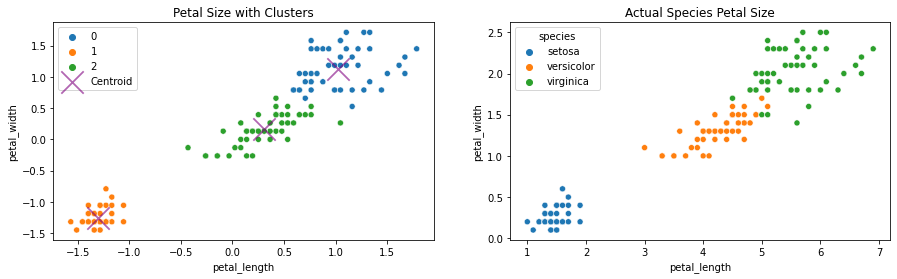

In [45]:
# plot scatters of actuals vs cluster predictions


plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = X_scaled, hue= 'clusters', palette='tab10')
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = centroids_scaled, color = 'purple',
               s = 500, marker = 'x', alpha = .6, label = 'Centroid')
plt.title('Petal Size with Clusters')


plt.subplot(1,2,2)
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue= 'species')
plt.title('Actual Species Petal Size')

plt.show()

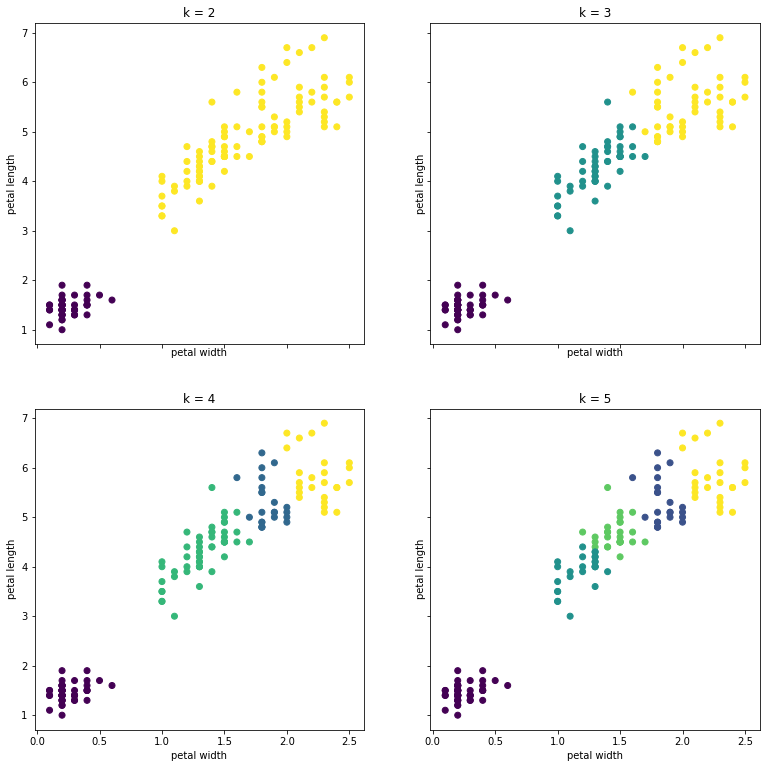

In [46]:
# plot the different ks to see how well they work

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X_df.petal_width, X_df.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='petal length')

#### Takeaways
- K = 3 closely resembles the actuals. seems like the dots are actually in little clusters.
- K = 2 has 2 very clear clusters and the graph represents that
- K = 5 seems like there are lines drawn arbitrarily through the bigger group 
- k = 4 is meh but not as unclear as 5

#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

#### 3. How does scaling impact the results of clustering?
 - Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.



#### Bonus
    a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
    b) Visualize the data and guess the number and shape of the clusters.
    c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
    d) Repeat the step above but with scaled data.
    c) Write down the takeaways from this exercise.